In [2]:
import sys
#change these paths to where they are located on your computer
sys.path.append("/Users/anirudhnatarajan/Documents/UPenn/McNeuron")
import McNeuron
import pickle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [3]:
tree_data = pickle.load(open('.././trees/tree_data.csv', 'rb'))

In [4]:
trees = tree_data.sort_values(['location'])
trees = trees.reset_index(drop=True)

In [5]:
def splitTrees(location) :
    """
    splitTrees is used to quickly and efficiently split the data into usable chunks

    Parameters:
    -----------
    location: string
        the name of the location where the tree is from, matches exactly with the trees dataset, and is a string

    Return:
    -------
    splitTrees returns 2 lists of equal size that contain proper training and testing data

    """
    
    ind = np.where(trees['location']==location)[0]
    
    train = [0] * size
    test = [0] * size
    rand = np.linspace(0,totalTrees-1,totalTrees)
    
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.setNormalizedFeatures()
        neuron.geometrical_features()
        neuron.motif_features()
        train[i] = neuron.getNeuronVector()
    
#     print('half')
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neuron = McNeuron.Neuron(trees['swc'][ind[int(rand[r])]])
        rand = np.delete(rand,r)
        neuron.setNormalizedFeatures()
        neuron.geometrical_features()
        neuron.motif_features()
        test[i] = neuron.getNeuronVector()
        
    return train,test

In [6]:
import pandas as pd
neurons = pd.read_pickle("/Users/anirudhnatarajan/Documents/UPenn/neuronData/neurons.csv")

In [7]:
indC = np.where(neurons['Experimental Condition']=='Control')[0]
indD = np.where(neurons['Species Name']=='drosophila melanogaster')[0]
indO = np.where(neurons['Primary Brain Region']=='optic Lobe')[0]
indP = np.where(neurons['Primary Brain Region']=='protocerebrum')[0]
swcO = [0] * 7099
swcP = [0] * 8890

counter = 0
for i in range(0,len(indD)) :
    if np.any(indC[:] == indD[i]) & np.any(indO[:] == indD[i]) :
        swcO[counter] = neurons['swc'][indD[i]]
        counter += 1

counter = 0
for i in range(0,len(indD)) :
    if np.any(indC[:] == indD[i]) & np.any(indP[:] == indD[i]) :
        swcP[counter] = neurons['swc'][indD[i]]
        counter += 1

In [8]:
def getNeuronVector(swc, size, rand) :
    n = [0] * size
    for i in range (0,size) :
        r = randint(0,len(rand)-1)
        neu = McNeuron.Neuron(swc[int(rand[r])])
        rand = np.delete(rand,r)
        neu.setNormalizedFeatures()
        neu.geometrical_features()
        neu.motif_features()
        n[i] = neu.getNeuronVector()
    return n,rand

In [9]:
totalTrees = 20
size = int(totalTrees/2)

trainG, testG = splitTrees('Gabon')
print('done')
trainH, testH = splitTrees('Ghana')
print('done')
trainU, testU = splitTrees('UK')
print('done')
trainW, testW = splitTrees('Wytham Meteoc (UK)')
print('done')

randO = np.linspace(0,len(swcO)-1,len(swcO))
randP = np.linspace(0,len(swcP)-1,len(swcP))
trainO,randO = getNeuronVector(swcO, size*2, randO)
print('done')
trainP,randP = getNeuronVector(swcP, size*2, randP)
print('done')
testO,randO = getNeuronVector(swcO, size*2, randO)
print('done')
testP,randP = getNeuronVector(swcP, size*2, randP)
print('done')

done
done
done
done
done
done
done
done


In [10]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import neighbors
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model

In [11]:
def subsetData(arr,q):
    """
    subsetData is used to split the data into lists with only 1 classifying feature in order to test how important each feature is individually for classification

    Parameters:
    -----------
    arr: array or list
        the master array that contains all the features
    q: int
        the index of the desired feature

    Return:
    -------
    subsetData returns an array with only 1 classifying feature

    """
    
    x = [0] * len(arr)
    for i in range(0,len(arr)) :
        x[i] = arr[i][q]
    return x

In [14]:
for q in range(0,32) :
    a = subsetData(trainO,q)
    b = subsetData(trainP,q)
    c = subsetData(trainG,q)
    d = subsetData(trainH,q)
    e = subsetData(trainU,q)
    f = subsetData(trainW,q)
    g = subsetData(testO,q)
    h = subsetData(testP,q)
    i = subsetData(testG,q)
    j = subsetData(testH,q)
    k = subsetData(testU,q)
    l = subsetData(testW,q)

    train = np.expand_dims(np.concatenate((a,b,c,d,e,f)),axis=1)
    test = np.expand_dims(np.concatenate((g,h,i,j,k,l)),axis=1)

    y = np.concatenate(([0] * size*4,[1] * size*4))
    clf = BaggingClassifier(RandomForestClassifier())
    clf.fit(train,y)
    z = clf.predict(test)

    sum = 0
    parts = 2
    for i in range (0,parts) :
        for j in range (0,size*4) :
            if z[j + size*4*i] == i :
                sum += 1
    accuracy = sum / len(z)
    print(accuracy, q)

0.7875 0
0.6875 1
0.7 2
0.6 3
0.6 4
0.6625 5
0.8625 6
0.8875 7
0.5375 8
0.9 9
0.4875 10
0.625 11
0.6625 12
0.7875 13
0.95 14
0.55 15
0.9 16
0.9 17
0.925 18
0.8625 19
0.95 20
0.675 21
0.725 22
0.875 23
0.875 24
0.7125 25
0.7625 26
0.825 27
0.65 28
0.95 29
0.9875 30
0.7375 31


In [19]:
def getFeatureImportance(length, featureNum) :
    """
    getFeatureImportance uses the subsetData function to generate a matrix with a large number of individual feature accuracies.

    Parameters:
    -----------
    length: int
        how many times the function will get new data and test the accuracy of individual features 
    featureNum: int
        the number of features needed to be tested

    Return:
    -------
    getFeatureImportance returns a matrix of shape (featureNum,length) with all values filled with the accuracy of each feature

    """
    
    masterFeature = np.zeros([featureNum, length])
    for t in range (0,length) :
        
        trainG, testG = splitTrees('Gabon')
        trainH, testH = splitTrees('Ghana')
        trainU, testU = splitTrees('UK')
        trainW, testW = splitTrees('Wytham Meteoc (UK)')
        print('done')

        randO = np.linspace(0,len(swcO)-1,len(swcO))
        randP = np.linspace(0,len(swcP)-1,len(swcP))
        trainO,randO = getNeuronVector(swcO, size*2, randO)
        trainP,randP = getNeuronVector(swcP, size*2, randP)
        testO,randO = getNeuronVector(swcO, size*2, randO)
        testP,randP = getNeuronVector(swcP, size*2, randP)
        print('done')
        
        for q in range(0,featureNum) :
            a = subsetData(trainO,q)
            b = subsetData(trainP,q)
            c = subsetData(trainG,q)
            d = subsetData(trainH,q)
            e = subsetData(trainU,q)
            f = subsetData(trainW,q)
            g = subsetData(testO,q)
            h = subsetData(testP,q)
            i = subsetData(testG,q)
            j = subsetData(testH,q)
            k = subsetData(testU,q)
            l = subsetData(testW,q)

            train = np.expand_dims(np.concatenate((a,b,c,d,e,f)),axis=1)
            test = np.expand_dims(np.concatenate((g,h,i,j,k,l)),axis=1)

            y = np.concatenate(([0] * size*4,[1] * size*4))
            clf = BaggingClassifier(RandomForestClassifier())
            clf.fit(train,y)
            z = clf.predict(test)

            sum = 0
            parts = 2
            for i in range (0,parts) :
                for j in range (0,size*4) :
                    if z[j + size*4*i] == i :
                        sum += 1
            accuracy = sum / len(z)
            masterFeature[q][t] = accuracy
        print(t)
    return masterFeature

done
done
0
done
done
1
done
done
2


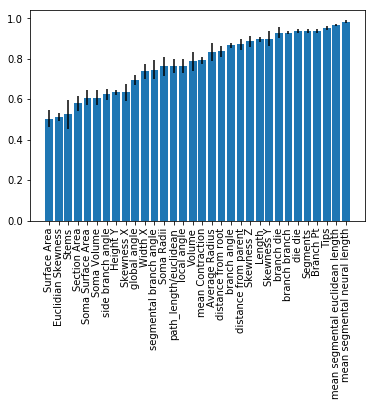

In [21]:
"""
This cell uses the getFeatureImportance funtion to get a large amount of data and graph the
results on a bar graph
"""
featureNames = ['Width X', 'Height Y', 'Soma Radii', 'Soma Surface Area', \
                'Soma Volume', 'Skewness X', 'Skewness Y', 'Skewness Z', \
                'Euclidian Skewness', 'Length', 'Surface Area', \
                'Section Area', 'Volume', 'Average Radius', 'Tips', \
                'Stems', 'Branch Pt', 'Segments', 'branch branch', \
                'branch die', 'die die', 'global angle', 'local angle', \
                'distance from parent', 'distance from root', \
                'path_length/euclidean', 'mean Contraction', \
                'branch angle', 'side branch angle', 'mean segmental neural length', \
                'mean segmental euclidean length', 'segmental branch angle']           
featureNum = len(featureNames)

featureArray = getFeatureImportance(3, featureNum)
values = np.zeros([2,featureNum])
for i in range(0,featureNum) :
    values[0,i] = featureArray[i,:].mean()
    values[1,i] = featureArray[i,:].std()
featureNames = np.vstack(featureNames)
index = np.argsort(values[0,:])
featureRange = np.linspace(0,featureNum-1,featureNum)
plt.bar(featureRange,values[0,index], yerr = values[1,index])
plt.xticks(featureRange,featureNames[index,0], rotation='vertical')
plt.subplots_adjust(bottom=0.15)

plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Misc/featureImportanceTreeVsNeuron.eps')

In [22]:
"""
Try out any of the following classifiers by uncommenting a line!
"""

#clf = svm.SVC()
#clf = RandomForestClassifier()
clf = ExtraTreesClassifier()
#clf = DecisionTreeClassifier()
#clf = GradientBoostingClassifier()
#clf = BaggingClassifier()
#clf = BaggingClassifier(ExtraTreesClassifier())
#clf = neighbors.KNeighborsClassifier()
#clf = SGDClassifier()
#clf = MLPClassifier()
#clf = GaussianNB()
#clf = linear_model.LinearRegression()

In [30]:
"""
Train the classifier and print the accuracy
"""

train = np.concatenate((trainO,trainP,trainG,trainH,trainU,trainW))
test = np.concatenate((testO,testP,testG,testH,testU,testW))

y = np.concatenate(([0] * size*4,[1] * size*4))
clf.fit(train,y)
z = clf.predict(test)

sum = 0
parts = 2
for i in range (0,parts) :
    for j in range (0,size*4) :
        if z[j + size*4*i] == i :
            sum += 1
accuracy = sum / len(z)
print(accuracy, sum)

1.0 80


40
40


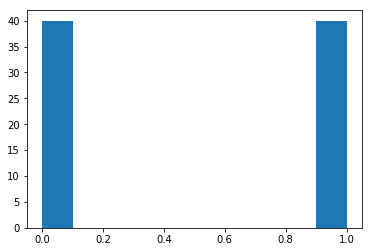

In [24]:
"""
This histogram gives you the breakdown of what the classifier predicted on the test values
"""

plt.hist(z)
print(len(np.where(z == 0)[0]))
print(len(np.where(z == 1)[0]))

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 10.279256
[t-SNE] Computed conditional probabilities in 0.009s
[t-SNE] Iteration 50: error = 56.3964119, gradient norm = 0.5121506 (50 iterations in 0.125s)
[t-SNE] Iteration 100: error = 55.9194717, gradient norm = 0.5317208 (50 iterations in 0.067s)
[t-SNE] Iteration 150: error = 59.2245407, gradient norm = 0.4510279 (50 iterations in 0.069s)
[t-SNE] Iteration 200: error = 56.2853088, gradient norm = 0.5359684 (50 iterations in 0.060s)
[t-SNE] Iteration 250: error = 57.8166618, gradient norm = 0.4885491 (50 iterations in 0.061s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.816662
[t-SNE] Iteration 300: error = 0.7359836, gradient norm = 0.0145611 (50 iterations in 0.064s)
[t-SNE] Iteration 350: error = 0.6547228, gradient norm = 0.0039782 (50 

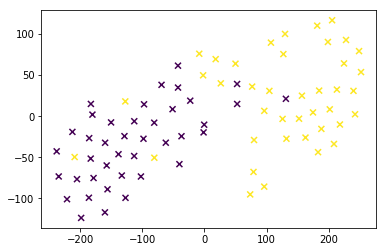

In [34]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, verbose=2).fit_transform(train)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, marker='x')
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Misc/treeNeuronClassificationTSNE.eps')

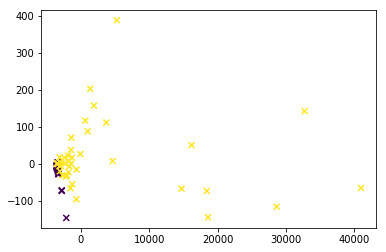

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(train,y)
X_embedded = pca.fit_transform(train,y)

plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y, marker='x')
# plt.savefig('/Users/anirudhnatarajan/Documents/UPenn/Misc/treeNeuronClassificationPCA.eps')